<a href="https://colab.research.google.com/github/mgnarag/painting_restoration/blob/main/unet_RGB_8_portion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
!ls drive/My\ Drive
file_path = "/content/drive/MyDrive/Baumgartner screenshots/"

'107.1 syllabus 1SAY1920 FINAL.gdoc'
'1C-01 Narag et al (1).pdf'
'1C-01 Narag et al.pdf'
'1FA971504AC646559D05A8ED6341AFB3[1025340].png'
'1H-04 Narag et al.pdf'
 20220802_182749.heic
 20220802_182831.heic
 20220802_183259.heic
 20220803_125819.heic
 20220803_125842.heic
 20220803_144229.heic
 20220803_144422.heic
 20220803_160724.heic
 20220803_160751.heic
 20220803_165240.heic
 20220803_165318.heic
 20220803_174701.heic
 20220803_174706.heic
 20220804_175217.heic
 20220804_175443.heic
 20220804_175616.heic
 20220804_181917.heic
 20220804_182007.heic
 20220804_182117.heic
 2S22-23_LE3-Regular-Set-A-FINAL-KEY.pdf
'3 classes (polarized)CM_alexnet.png'
'3 classes (polarized)CM_vgg.png'
'A4_Physics 71 TWHFU-3_gradesheet (1).pdf'
'A4_Physics 71 TWHFU-3_officialgrades (1).pdf'
'A4_Physics 71 TWHFU-3_officialgrades.gdoc'
'Abstract - NARAG, Mark Jeremy.pdf'
'Annex 1 (copy of Journal).pdf'
'Annex 2 (Proof of employments).pdf'
'App Physics 181 THY-FX-2_studentcontactlist.xlsx'
 Architectural_des

## Installing packages

In [3]:
import time
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from PIL import Image, ImageOps
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from scipy.ndimage import zoom

import cv2
from skimage import color

from tensorflow import keras
from PIL import Image, ImageOps
import numpy as np
import PIL
PIL.Image.MAX_IMAGE_PIXELS = 236958876
from sklearn.model_selection import train_test_split

## Defining functions

In [4]:
def zoom_and_resize(img, zoom_factor):
    height, width = img.shape[:2]
    crop_top = int((height - height / zoom_factor) / 2)# Calculate the region to crop around the center
    crop_bottom = int(height - crop_top)
    crop_left = int((width - width / zoom_factor) / 2)
    crop_right = int(width - crop_left)
    cropped_image = img[crop_top:crop_bottom, crop_left:crop_right]    # Crop the image
    resized_image = cv2.resize(cropped_image, (width, height))# Resize the zoomed image back to the original dimensions
    return resized_image

def crop(im):
    width, height = im.size
    data = []
    step = int(size * 0.80)  # Adjust the step size for cropping
    for j in range(0, height, step):
        for i in range(0, width, step):
            if i + size <= width and j + size <= height:
                im1 = im.crop((i, j, i + size, j + size))
                im1 = np.array(im1).astype(np.float32)
                data.append(im1/255)
                #im1 = np.rot90(im1)
                #data.append(im1/255)
                #im1 = np.rot90(im1)
                #data.append(im1/255)
                #im1 = np.rot90(im1)
                #data.append(im1/255)
                for z in zoom_factor:
                    zoomed_img = zoom_and_resize(im1, z)
                    data.append(zoomed_img/255)
    return data

def contrast_stretch(image):
    img_array = np.array(image)
    for i in range(3):  # 3 channels: Red, Green, Blue
        # Compute min and max pixel intensity values for the channel
        min_val = np.min(img_array[:,:,i])
        max_val = np.max(img_array[:,:,i])
        # Apply contrast stretching
        img_array[:,:,i] = (img_array[:,:,i] - min_val) * (255.0 / (max_val - min_val))
    # Convert numpy array back to PIL Image
    stretched_image = Image.fromarray(np.uint8(img_array))
    return stretched_image

## Preparing the training dataset

In [5]:
size = 8
model_number = size

zoom_factor = []
input = []
output = []

input_folder_path = file_path + 'Training/portion only/input/'
output_folder_path = file_path + 'Training/portion only/output/'

# List all files in the directory and sort them alphabetically
input_files = sorted(os.listdir(input_folder_path))
output_files = sorted(os.listdir(output_folder_path))


for image_file in input_files:
    image_path = os.path.join(input_folder_path, image_file)
    image = Image.open(image_path).convert('RGB')
    image = crop(image)
    input.extend(image)

for image_file in output_files:
    image_path = os.path.join(output_folder_path, image_file)
    image = Image.open(image_path).convert('RGB')
    image = crop(image)
    output.extend(image)
input = np.array(input)
output = np.array(output)

print("Done reading the input of size = ", input.shape)
print("Done reading the output of size = ", output.shape)

# Split the data into training and testing sets
train_input, test_input, train_output, test_output = train_test_split(
    input, output, test_size=0.2, random_state=42)

print("Done reading the train input of size = ", train_input.shape)
print("Done reading the test input of size = ", test_input.shape)
print("Done reading the train output of size = ", train_input.shape)
print("Done reading the test output of size = ", test_input.shape)

input = []
output = []

Done reading the input of size =  (6627, 8, 8, 3)
Done reading the output of size =  (6627, 8, 8, 3)
Done reading the train input of size =  (5301, 8, 8, 3)
Done reading the test input of size =  (1326, 8, 8, 3)
Done reading the train output of size =  (5301, 8, 8, 3)
Done reading the test output of size =  (1326, 8, 8, 3)


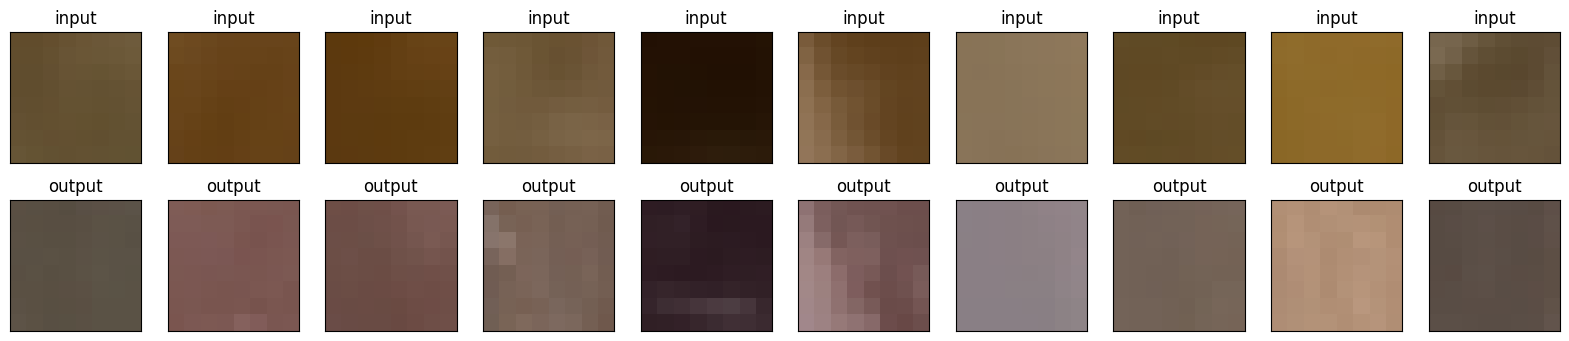

In [7]:
N = 1000
n = 10
plt.figure(figsize=(20, 4))
for i in range(0,10):
    ax = plt.subplot(2, n, i + 1)
    plt.title("input")
    plt.imshow((train_input[i+N]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    bx = plt.subplot(2, n, i + n + 1)
    plt.title("output")
    plt.imshow((train_output[i+N]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

## Creating the Unet model

In [8]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization
from keras.optimizers import Adam
import tensorflow as tf

# SSIM loss function
def ssim_loss(y_true, y_pred):
    return 1 - tf.reduce_mean(tf.image.ssim(y_true, y_pred, max_val=1.0))

def unet_model(input_shape=(size, size, 3)):
    inputs = Input(input_shape)

    # Contracting Path
    conv1 = Conv2D(8, 3, activation='relu', padding='same')(inputs)
    conv1 = Conv2D(8, 3, activation='relu', padding='same')(conv1)

    conv2 = Conv2D(16, 3, activation='relu', padding='same', strides=2)(conv1)
    conv2 = Conv2D(16, 3, activation='relu', padding='same')(conv2)

    #conv3 = Conv2D(32, 3, activation='relu', padding='same', strides=2)(conv2)
    #conv3 = Conv2D(32, 3, activation='relu', padding='same')(conv3)

    #conv4 = Conv2D(64, 3, activation='relu', padding='same', strides=2)(conv3)
    #conv4 = Conv2D(64, 3, activation='relu', padding='same')(conv4)

    #conv5 = concatenate([Conv2DTranspose(32, kernel_size=3, strides=2, activation='relu', padding='same')(conv4), conv3], axis=-1)
    #conv5 = Conv2D(32, 3, activation='relu', padding='same')(conv5)

    #conv6 = concatenate([Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same')(conv3), conv2], axis=-1)
    #conv6 = Conv2D(16, 3, activation='relu', padding='same')(conv6)

    conv7 = concatenate([Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same')(conv2), conv1], axis=-1)
    conv7 = Conv2D(8, 3, activation='relu', padding='same')(conv7)

    # Output Layer
    output = Conv2D(3, kernel_size=(3, 3), activation='sigmoid', padding='same')(conv7)

    model = Model(inputs=inputs, outputs=output)
    return model

# Usage example:
unet = unet_model()
unet.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 8, 8, 3)]            0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 8, 8, 8)              224       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 8, 8, 8)              584       ['conv2d[0][0]']              
                                                                                                  
 conv2d_2 (Conv2D)           (None, 4, 4, 16)             1168      ['conv2d_1[0][0]']            
                                                                                              

## Training the Unet model

In [9]:
from keras.optimizers import Adam
from tensorflow.keras import layers, losses

opt = Adam(learning_rate=0.0001)
#unet.compile(optimizer=opt, loss=ssim_loss)  # Using SSIM loss function
unet.compile(optimizer=opt, loss=losses.MeanSquaredError())
# Train your model as before
start = time.time()
model = unet.fit(train_input, train_output,
                epochs=100,
                shuffle=True,
                validation_data=(test_input, test_output),batch_size=32)
end = time.time()

print("The time of execution of above program is :",
      (end-start), "seconds")

unet.save(file_path + 'Model/portion only/unet_' + str(model_number) + '_rgb')

loss = model.history['loss']
loss = pd.DataFrame(loss)
loss.to_csv(file_path + 'Model/portion only/loss_'+ str(model_number) + '_rgb.csv')
val_loss = model.history['val_loss']
val_loss = pd.DataFrame(val_loss)
val_loss.to_csv(file_path  +'Model/portion only/val_loss_'+ str(model_number)+ '_rgb.csv')

Epoch 1/100
166/166 [==============================] - 8s 10ms/step - loss: 0.0293 - val_loss: 0.0258
Epoch 2/100
166/166 [==============================] - 1s 5ms/step - loss: 0.0220 - val_loss: 0.0153
Epoch 3/100
166/166 [==============================] - 1s 5ms/step - loss: 0.0116 - val_loss: 0.0087
Epoch 4/100
166/166 [==============================] - 1s 6ms/step - loss: 0.0071 - val_loss: 0.0062
Epoch 5/100
166/166 [==============================] - 1s 5ms/step - loss: 0.0057 - val_loss: 0.0054
Epoch 6/100
166/166 [==============================] - 1s 5ms/step - loss: 0.0049 - val_loss: 0.0047
Epoch 7/100
166/166 [==============================] - 1s 7ms/step - loss: 0.0042 - val_loss: 0.0042
Epoch 8/100
166/166 [==============================] - 1s 8ms/step - loss: 0.0036 - val_loss: 0.0036
Epoch 9/100
166/166 [==============================] - 3s 15ms/step - loss: 0.0032 - val_loss: 0.0033
Epoch 10/100
166/166 [==============================] - 1s 6ms/step - loss: 0.0030 - val_

## Testing the model

5/5 [==============================] - 0s 3ms/step


(<Figure size 640x480 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7ee67023c9a0>)

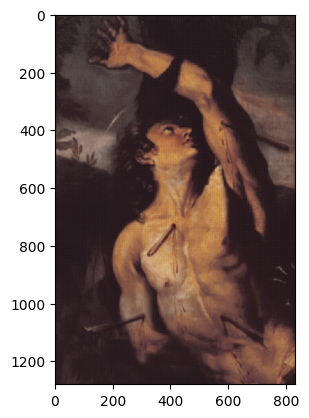

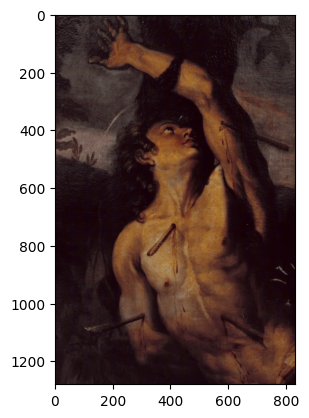

In [16]:
n_size = 8
size = 8

def rgb_L_ab(rgb_image, test_L):
    lab_array = color.rgb2lab(np.array(rgb_image))# Convert RGB to LAB colorspace
    lab_array[..., 0] = test_L #Change L channel to input
    rgb_array = color.lab2rgb(lab_array)# Convert back LAB to RGB colorspace
    rgb_array = (rgb_array * 255).astype(np.uint8)# Scale RGB values back to the range [0, 255]
    rgb_array = Image.fromarray(rgb_array, mode='RGB')# Convert RGB array back to image
    return rgb_array

def crop_(im):
    width, height = im.size
    data = []
    for j in range(0,int(height/n_size)):
        for i in range(0,int(width/n_size)):
            im1 = im.crop((0 + (n_size*i), 0 + (n_size*j), n_size + (n_size*i), n_size + (n_size*j)))
            im1 = np.array(im1)
            im1 = im1.astype(np.float32)
            im1 = im1/255
            data.append(im1)
    return data

#----------------READING THE TEST IMAGE--------------------#
filename = str("[21]TheResistor-Before.png")
test = Image.open(file_path+ "Testing/portion only/" + filename).convert('RGB')
test_L = color.rgb2lab(np.array(test))
test_L = test_L[..., 0]
w_dirty, h_dirty = test.size
#----------------------------------------------------------#

autoencoder = keras.models.load_model(file_path + 'Model/portion only/unet_'+str(n_size)+'_rgb')

xx = int(w_dirty/n_size)
final=[]

for portion in range(0,xx):
    im1 = test.crop((n_size*portion, 0, (n_size*portion) + n_size, h_dirty))
    w1, h1 = im1.size
    w = int(w1/n_size)
    h = int(h1/n_size)
    neverbeforeseen = np.array(crop_(im1))
    decoded_imgs = autoencoder.predict(neverbeforeseen)
    col = np.vstack((decoded_imgs[0],decoded_imgs[1]))
    for i in range(2,h):
        col = np.vstack((col,decoded_imgs[i]))
    y = col
    y = (y * 255).astype('uint8')
    if portion == 0:
        final = y
    if portion > 0:
        final = np.hstack((final,y))

#----------------TEST ON FULL RGB--------------------#
final_rgb = final
final_rgb = np.squeeze(final_rgb)
reconstructed_rgb = Image.fromarray(final_rgb)
reconstructed_rgb.save(file_path + "Testing/portion only/"+"Model_1_"+filename)
plt.figure(), plt.imshow(reconstructed_rgb)

#----------------TEST ON L from input and AB from convert RGB2LAB of model--------------------#
final_lab = rgb_L_ab(final, test_L)
final_lab = np.squeeze(final_lab)
reconstructed_lab = Image.fromarray(final_lab)
reconstructed_lab.save(file_path + "Testing/portion only/"+"Model_2_"+filename)
plt.figure(), plt.imshow(reconstructed_lab)

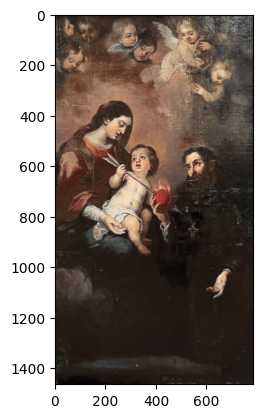

In [ ]:
plt.imshow(contrast_stretch(reconstructed_rgb))

In [ ]:
from PIL import Image
import numpy as np
from skimage.metrics import structural_similarity as ssim

# Function to open image and convert to numpy array
def load_image(image_path):
    image = Image.open(image_path).convert('RGB')  # Ensure image is in RGB mode
    return np.array(image)

image_path1 = file_path + 'file_path + "Testing/"+"Model_1_"+filename'
image_path2 = file_path + "Testing/"+"Model_2_"+filename

# Load images
image1 = load_image(image_path1)
image2 = load_image(image_path2)

# Ensure the images have the same dimensions
if image1.shape != image2.shape:
    raise ValueError("Input images must have the same dimensions.")

# Compute SSIM for each channel and average the results
ssim_index_r = ssim(image1[:, :, 0], image2[:, :, 0], data_range=image1[:, :, 0].max() - image1[:, :, 0].min())
ssim_index_g = ssim(image1[:, :, 1], image2[:, :, 1], data_range=image1[:, :, 1].max() - image1[:, :, 1].min())
ssim_index_b = ssim(image1[:, :, 2], image2[:, :, 2], data_range=image1[:, :, 2].max() - image1[:, :, 2].min())

ssim_index_rgb = (ssim_index_r + ssim_index_g + ssim_index_b) / 3

print(f"SSIM for R channel: {ssim_index_r}")
print(f"SSIM for G channel: {ssim_index_g}")
print(f"SSIM for B channel: {ssim_index_b}")
print(f"Average SSIM for RGB image(Method4): {ssim_index_rgb}")

SSIM for R channel: 0.7135495848132634
SSIM for G channel: 0.7148738323294628
SSIM for B channel: 0.6639641471293708
Average SSIM for RGB image(Method4): 0.6974625214240323
